

# Project: Investigate TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected the tmdb movies data set , and my aim is to find answers for my question which are :
<br>
what kind of properties are accociated with movies that have large or high profit , also trying to find important relation among some variables in addition to Which year has the most popular movies? and Find which movie is most favoured by people .

In [162]:

import pandas as pd 
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


<a id='Assessing'></a>
## Data Assessing
number of samples 
<br>
number of columns 
<br>
duplicate rows 
<br>
datatypes of columns
<br>
features with missing values
<br>
number of non-null unique values for features t
<br>
what those unique values are and counts for each



In [163]:

df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [165]:
df.shape

(10866, 21)

In [166]:
df.duplicated().sum()

1

In [167]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [168]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64



### Data Cleaning 
here i will preform some tasks to clean data which are :
<br>
First:  dropping the Extraneous Columns as i wont be using them in my analysis
<br> 
second: dropping the duplicates
<br>
Third : dropping the nan values


First: dropping the extraneous columns 
 

In [169]:
# drop columns from 2008 dataset
df.drop(['id', 'imdb_id', 'homepage','tagline','overview','keywords','budget','revenue'], axis=1, inplace=True)

# confirm changes
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


second: dropping the duplicates

In [170]:
df.drop_duplicates(inplace=True)

In [171]:
# print number of duplicates again to confirm dedupe - should both be 0
print(df.duplicated().sum())

0


Third dropping the nan values


In [172]:
df.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [173]:
df.dropna(inplace=True)

In [174]:
# checks if any of columns have null values - should print False
df.isnull().sum().any()

False

### Data wrangling 
here i will organize the data more by splitting some coloums to take the main value from them and after that i will be adding new col with the selected values and making excess operation which i will state along the cells



In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   original_title        9772 non-null   object 
 2   cast                  9772 non-null   object 
 3   director              9772 non-null   object 
 4   runtime               9772 non-null   int64  
 5   genres                9772 non-null   object 
 6   production_companies  9772 non-null   object 
 7   release_date          9772 non-null   object 
 8   vote_count            9772 non-null   int64  
 9   vote_average          9772 non-null   float64
 10  release_year          9772 non-null   int64  
 11  budget_adj            9772 non-null   float64
 12  revenue_adj           9772 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.0+ MB


In [176]:
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Here there are more than one col which has several value : for example the genres col 
<br>
i splitted each of genres , cast and production companies and took the first value of the split as the main value of the col 

In [177]:
df['main_genre']=df.genres.str.split(pat='|',expand=True)[0]

In [178]:
df['main_actor']=df.cast.str.split(pat='|',expand=True)[0]

In [179]:
df['main_production_company']=df.production_companies.str.split(pat='|',expand=True)[0]

In [180]:
df['profit']=df.revenue_adj-df.budget_adj

In [181]:
df.drop(['genres','production_companies','cast'], axis=1, inplace=True)


In [182]:
df.release_date=pd.to_datetime(df.release_date)

In [183]:
df.head()

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,main_actor,main_production_company,profit
0,32.985763,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Chris Pratt,Universal Studios,1.254446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Tom Hardy,Village Roadshow Pictures,2.101614e+08
2,13.112507,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Shailene Woodley,Summit Entertainment,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Harrison Ford,Lucasfilm,1.718723e+09
4,9.335014,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Vin Diesel,Universal Pictures,1.210949e+09


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   popularity               9772 non-null   float64       
 1   original_title           9772 non-null   object        
 2   director                 9772 non-null   object        
 3   runtime                  9772 non-null   int64         
 4   release_date             9772 non-null   datetime64[ns]
 5   vote_count               9772 non-null   int64         
 6   vote_average             9772 non-null   float64       
 7   release_year             9772 non-null   int64         
 8   budget_adj               9772 non-null   float64       
 9   revenue_adj              9772 non-null   float64       
 10  main_genre               9772 non-null   object        
 11  main_actor               9772 non-null   object        
 12  main_production_company  9772 non

In [185]:
#This is to extract year from the release_date col
df['month'] = pd.DatetimeIndex(df['release_date']).month


In [186]:
df.head()

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,main_actor,main_production_company,profit,month
0,32.985763,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Chris Pratt,Universal Studios,1.254446e+09,6
1,28.419936,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Tom Hardy,Village Roadshow Pictures,2.101614e+08,5
2,13.112507,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Shailene Woodley,Summit Entertainment,1.704191e+08,3
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Harrison Ford,Lucasfilm,1.718723e+09,12
4,9.335014,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Vin Diesel,Universal Pictures,1.210949e+09,4


In [187]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,month
count,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9.772000e+03,9772.000000
mean,0.694721,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07,3.763710e+07,6.875358
std,1.036931,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08,1.314756e+08,3.410691
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08,1.000000
25%,0.232710,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.000000
50%,0.419762,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00,0.000000e+00,7.000000
75%,0.776408,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07,2.029698e+07,10.000000
max,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09,12.000000


ok here i will organize the profit col as i want to know which will be considered as a high profit or low 

In [188]:
df.describe()['profit']

count    9.772000e+03
mean     3.763710e+07
std      1.314756e+08
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      2.029698e+07
max      2.750137e+09
Name: profit, dtype: float64

as we see we have a problem here which is that we find that that many movies have the value "0" in the revenue_adj and the budget_adj columns the profit is also not accurate as a result. These rows needs to be dropped 

In [189]:
# rz stands for remove zeros
df_rz=df[df['revenue_adj']!=0]
df_rz=df_rz[df_rz['budget_adj']!=0]
df_rz.shape

(3805, 15)

In [190]:
df_rz.describe()['profit']

count    3.805000e+03
mean     9.399617e+07
std      1.950332e+08
min     -4.139124e+08
25%     -1.420000e+06
50%      2.851334e+07
75%      1.090266e+08
max      2.750137e+09
Name: profit, dtype: float64

here i will make a function to create levels for a desired column

In [191]:
def col_levels(df,column_label,bin_names):
    bin_edges=[
    df[column_label].describe()['min'],
    df[column_label].describe()['25%'],
    df[column_label].describe()['50%'],
    df[column_label].describe()['75%'],
    df[column_label].describe()['max']]
    level_column_label=column_label+"_levels"
    df[level_column_label]=pd.cut(df[column_label], bin_edges, labels=bin_names)
    return df

In [192]:
# Labels for the four profit level groups
bin_names = ['extreem loss','loss','mid','High' ] # Name each profit level category
df_rz=col_levels(df_rz,'profit',bin_names)
df_rz.head()

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,main_actor,main_production_company,profit,month,profit_levels
0,32.985763,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Chris Pratt,Universal Studios,1.254446e+09,6,High
1,28.419936,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Tom Hardy,Village Roadshow Pictures,2.101614e+08,5,High
2,13.112507,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Shailene Woodley,Summit Entertainment,1.704191e+08,3,High
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Harrison Ford,Lucasfilm,1.718723e+09,12,High
4,9.335014,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Vin Diesel,Universal Pictures,1.210949e+09,4,High


In [193]:
df_rz.describe()['profit']

count    3.805000e+03
mean     9.399617e+07
std      1.950332e+08
min     -4.139124e+08
25%     -1.420000e+06
50%      2.851334e+07
75%      1.090266e+08
max      2.750137e+09
Name: profit, dtype: float64

In [194]:
df.describe()['popularity']

count    9772.000000
mean        0.694721
std         1.036931
min         0.000188
25%         0.232710
50%         0.419762
75%         0.776408
max        32.985763
Name: popularity, dtype: float64

In [195]:
bin_names = ['very low','low','mid','High' ]
df=col_levels(df,'popularity',bin_names)
df.head()

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,main_actor,main_production_company,profit,month,popularity_levels
0,32.985763,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Chris Pratt,Universal Studios,1.254446e+09,6,High
1,28.419936,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Tom Hardy,Village Roadshow Pictures,2.101614e+08,5,High
2,13.112507,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Shailene Woodley,Summit Entertainment,1.704191e+08,3,High
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Harrison Ford,Lucasfilm,1.718723e+09,12,High
4,9.335014,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Vin Diesel,Universal Pictures,1.210949e+09,4,High


after doing this , now we can answer many questions which will be in the EDA section 

<a id='eda'></a>
## Exploratory Data Analysis




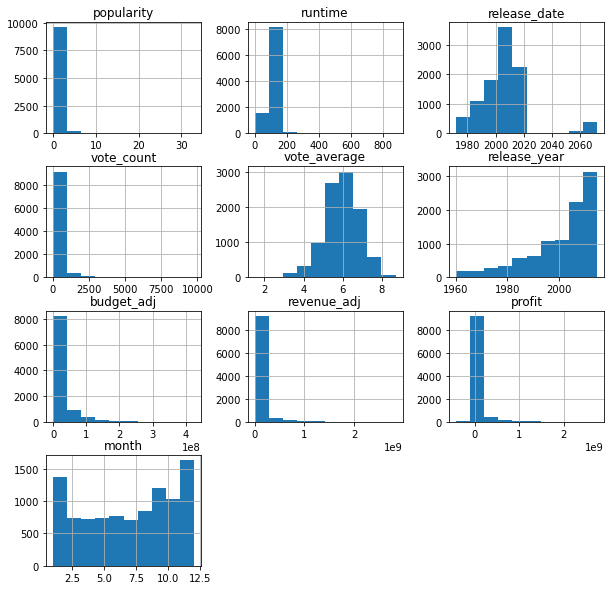

In [196]:
df.hist(figsize=(10,10));

Here i will answer some basic question before going to see important relations among the variables

Here you can find the most frequent directors in each profit category:

In [197]:
df_rz.groupby('profit_levels').agg(lambda x:x.value_counts().index[0])['director']

profit_levels
extreem loss        Renny Harlin
loss                 Kevin Smith
mid               Clint Eastwood
High            Steven Spielberg
Name: director, dtype: object

Steven Spielberg is the director with most movies that made high profit.

Here you can find the most frequent genre in each profit category:

In [198]:
df_rz.groupby('profit_levels').agg(lambda x:x.value_counts().index[0])['main_genre']

profit_levels
extreem loss     Drama
loss             Drama
mid             Comedy
High            Action
Name: main_genre, dtype: object

we see here that high profit movies will likly be action movies

Here you can find the years of the biggest losses and largest profits:


In [199]:
df_rz.groupby('profit_levels').agg(lambda x:x.value_counts().index[0])['release_year']

profit_levels
extreem loss    2009
loss            2011
mid             2005
High            2014
Name: release_year, dtype: int64

The year 2014 is the year with the most profit movies

### Relationship between Important Variables

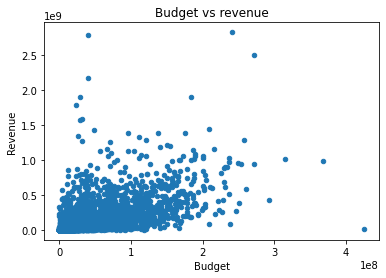

In [214]:
df_rz.plot.scatter(x = 'budget_adj', y = 'revenue_adj');
plt.title("Budget vs revenue");
plt.xlabel("Budget");
plt.ylabel("Revenue");

We can say that investment seems to affect returns positively for a movie (posstive correlation).

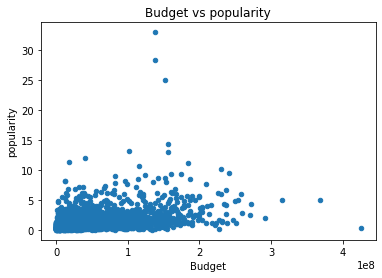

In [215]:
df_rz.plot.scatter(x = 'budget_adj', y = 'popularity');
plt.title("Budget vs popularity");
plt.xlabel("Budget");
plt.ylabel("popularity");

As budget increases, the popularity seems to show an increasing trend.



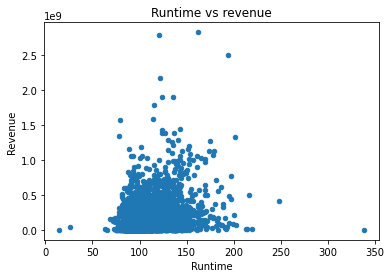

In [216]:
df_rz.plot.scatter(x = 'runtime', y = 'revenue_adj');
plt.title("Runtime vs revenue");
plt.xlabel("Runtime");
plt.ylabel("Revenue");

We observe that movies close to a runtime of 130 minutes are possible to register higher returns.

### Research Question 1 (Which year has the most popular movies?)

Text(0.5, 0, 'popularity ')

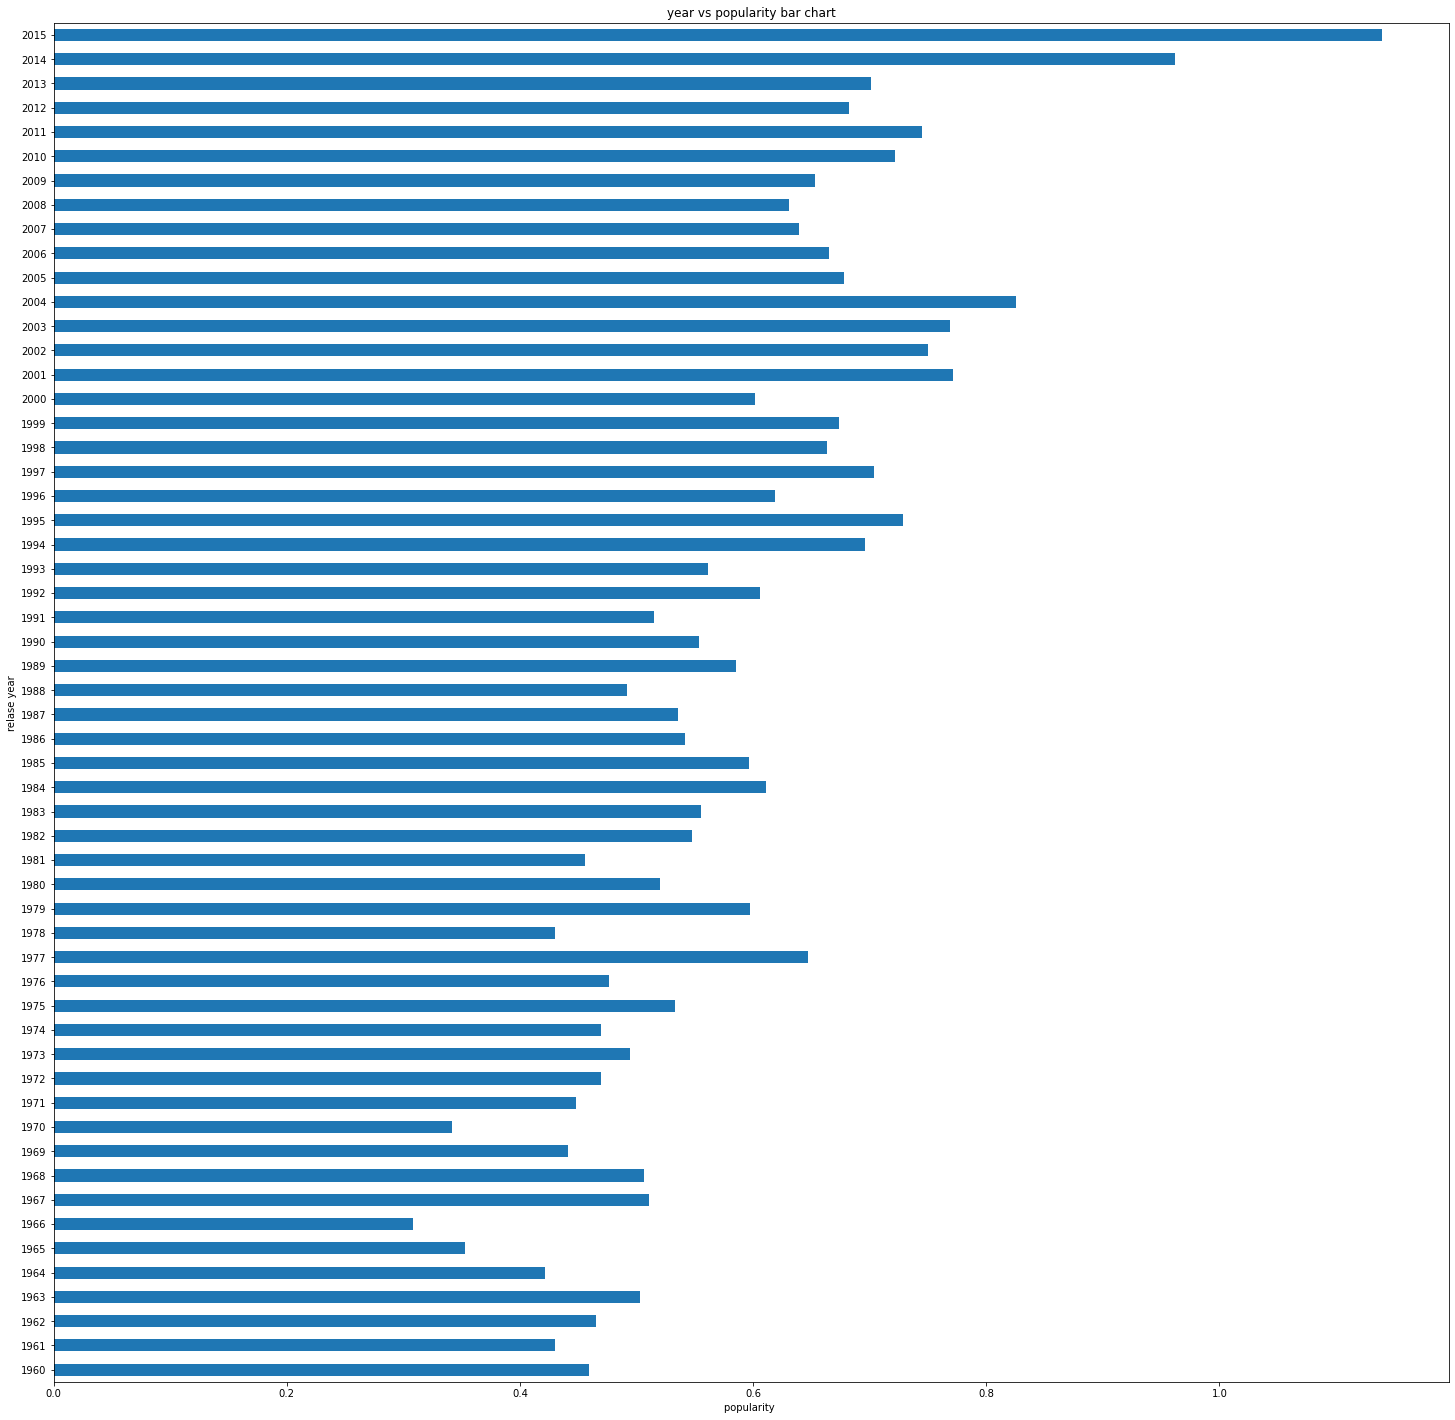

In [206]:
yvpm=df.groupby('release_year')['popularity'].mean()
yvpm.plot(kind="barh",figsize=(25,25))
plt.title("year vs popularity bar chart")
plt.ylabel("relase year")
plt.xlabel("popularity ")

from the graph plot of (2015) and (2014) are the years with the most popular movies .

### Research Question 2  (What are the characteristics associated high profit movies ?)

In [207]:
df_m = df_rz.query('profit_levels == "High"')
df_m.head()

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,main_actor,main_production_company,profit,month,profit_levels
0,32.985763,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Chris Pratt,Universal Studios,1.254446e+09,6,High
1,28.419936,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Tom Hardy,Village Roadshow Pictures,2.101614e+08,5,High
2,13.112507,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Shailene Woodley,Summit Entertainment,1.704191e+08,3,High
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Harrison Ford,Lucasfilm,1.718723e+09,12,High
4,9.335014,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Vin Diesel,Universal Pictures,1.210949e+09,4,High


In [208]:
df_m.describe()


,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,month
count,951.000000,951.000000,951.000000,951.000000,951.000000,9.510000e+02,9.510000e+02,9.510000e+02,951.000000
mean,2.247750,116.398528,1281.132492,6.495794,1999.129338,7.832576e+07,4.015727e+08,3.232469e+08,7.497371
std,2.349182,22.658424,1362.869723,0.699340,12.984569,5.712787e+07,2.988253e+08,2.787612e+08,3.232034
min,0.131526,69.000000,13.000000,4.200000,1960.000000,2.248029e+02,1.169945e+08,1.090277e+08,1.000000
25%,1.022218,99.000000,356.500000,6.000000,1992.000000,3.343217e+07,2.110925e+08,1.500418e+08,5.000000
50%,1.641739,113.000000,774.000000,6.500000,2002.000000,6.584719e+07,3.082597e+08,2.264043e+08,7.000000
75%,2.688673,129.000000,1708.500000,7.000000,2010.000000,1.115397e+08,4.888207e+08,3.915575e+08,11.000000
max,32.985763,248.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09,12.000000


Here we see that :-
<br>
The mean run time of the high profit movies is 116 min
<br>
The mean budget for movies with high profit movies is 7.827280e+07
<br>
More information will be disscussed in the coming cells


In [209]:
s=df_m['main_genre'].value_counts()

Text(0.5, 0, 'movies ')

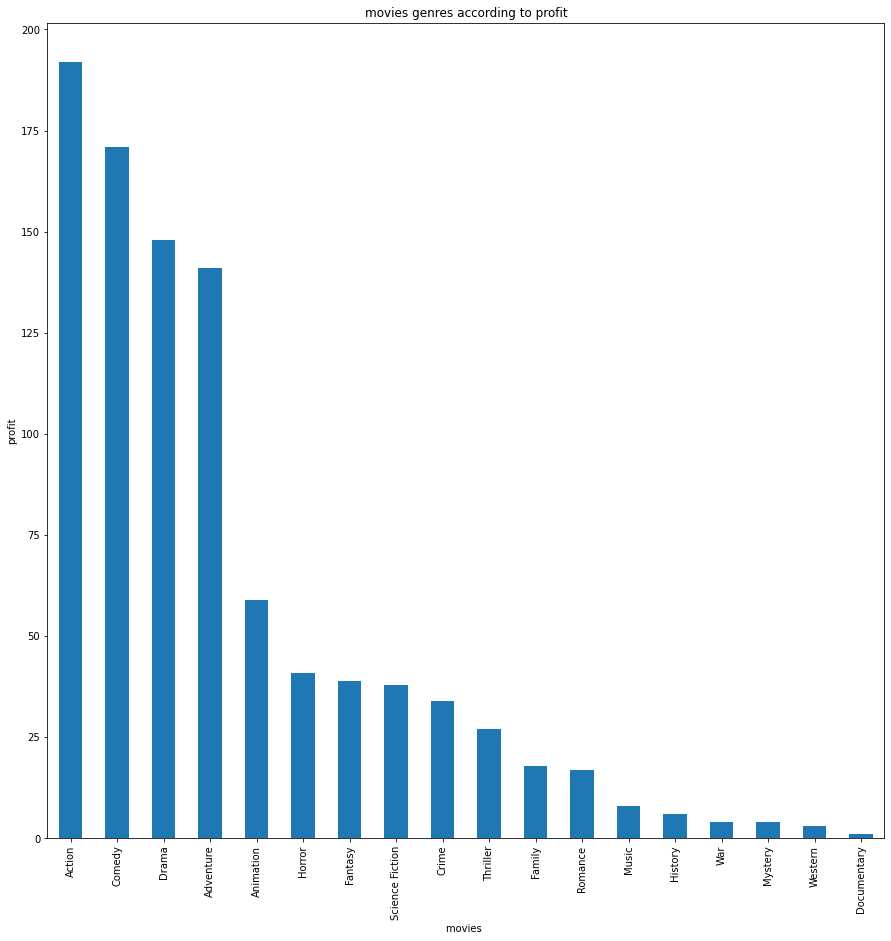

In [210]:
s.plot(kind='bar',figsize=(15,15))
plt.title("movies genres according to profit")
plt.ylabel("profit")
plt.xlabel("movies ")

Here we see that the top four genres of the high profit movies are : Action , comedy , Drama , Adventrue

In [211]:

j=df_m['main_production_company'][:50].value_counts()

Text(0.5, 0, 'production companies')

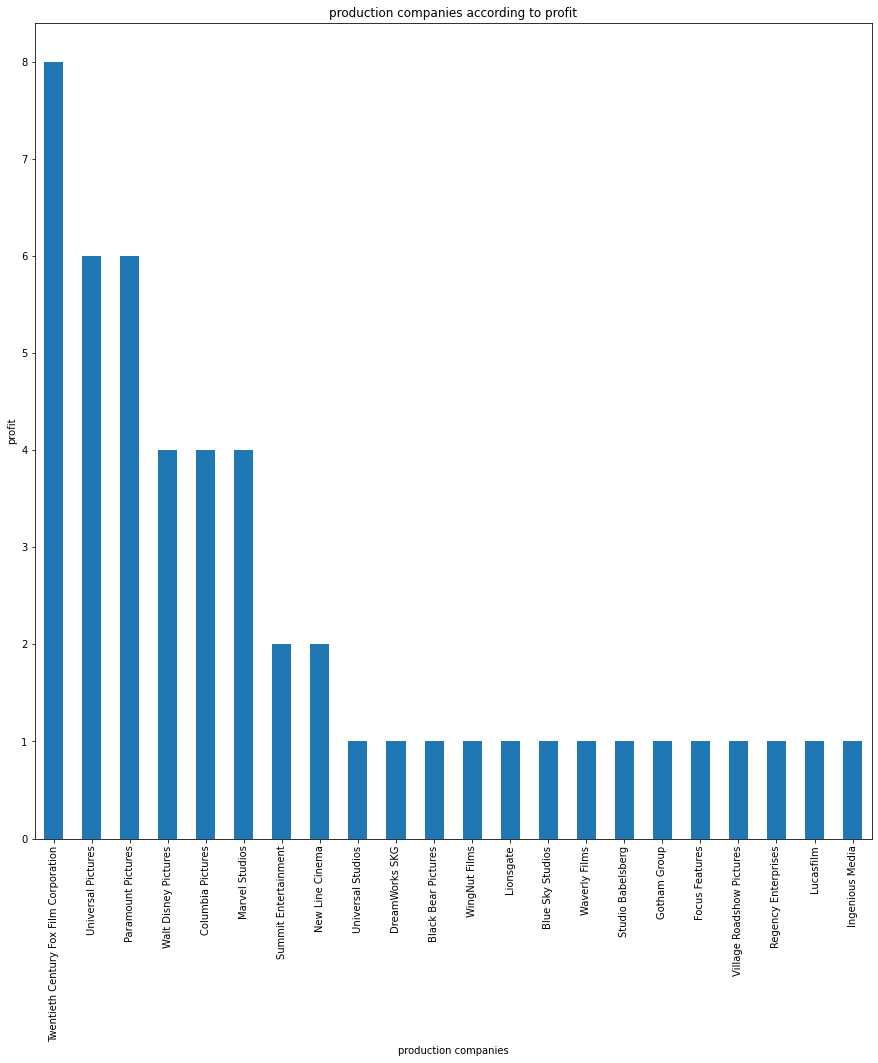

In [212]:
j.plot(kind='bar',figsize=(15,15))
plt.title("production companies according to profit")
plt.ylabel("profit")
plt.xlabel("production companies")

Here we see that the top four production companies of the high profit movies are : Twentieth century fox film corporation , universal pictures , paramount pictures , walt disney pictures

### Research Question 3 (Find which movie is most favoured by people)

Text(0.5, 0, 'popularity ')

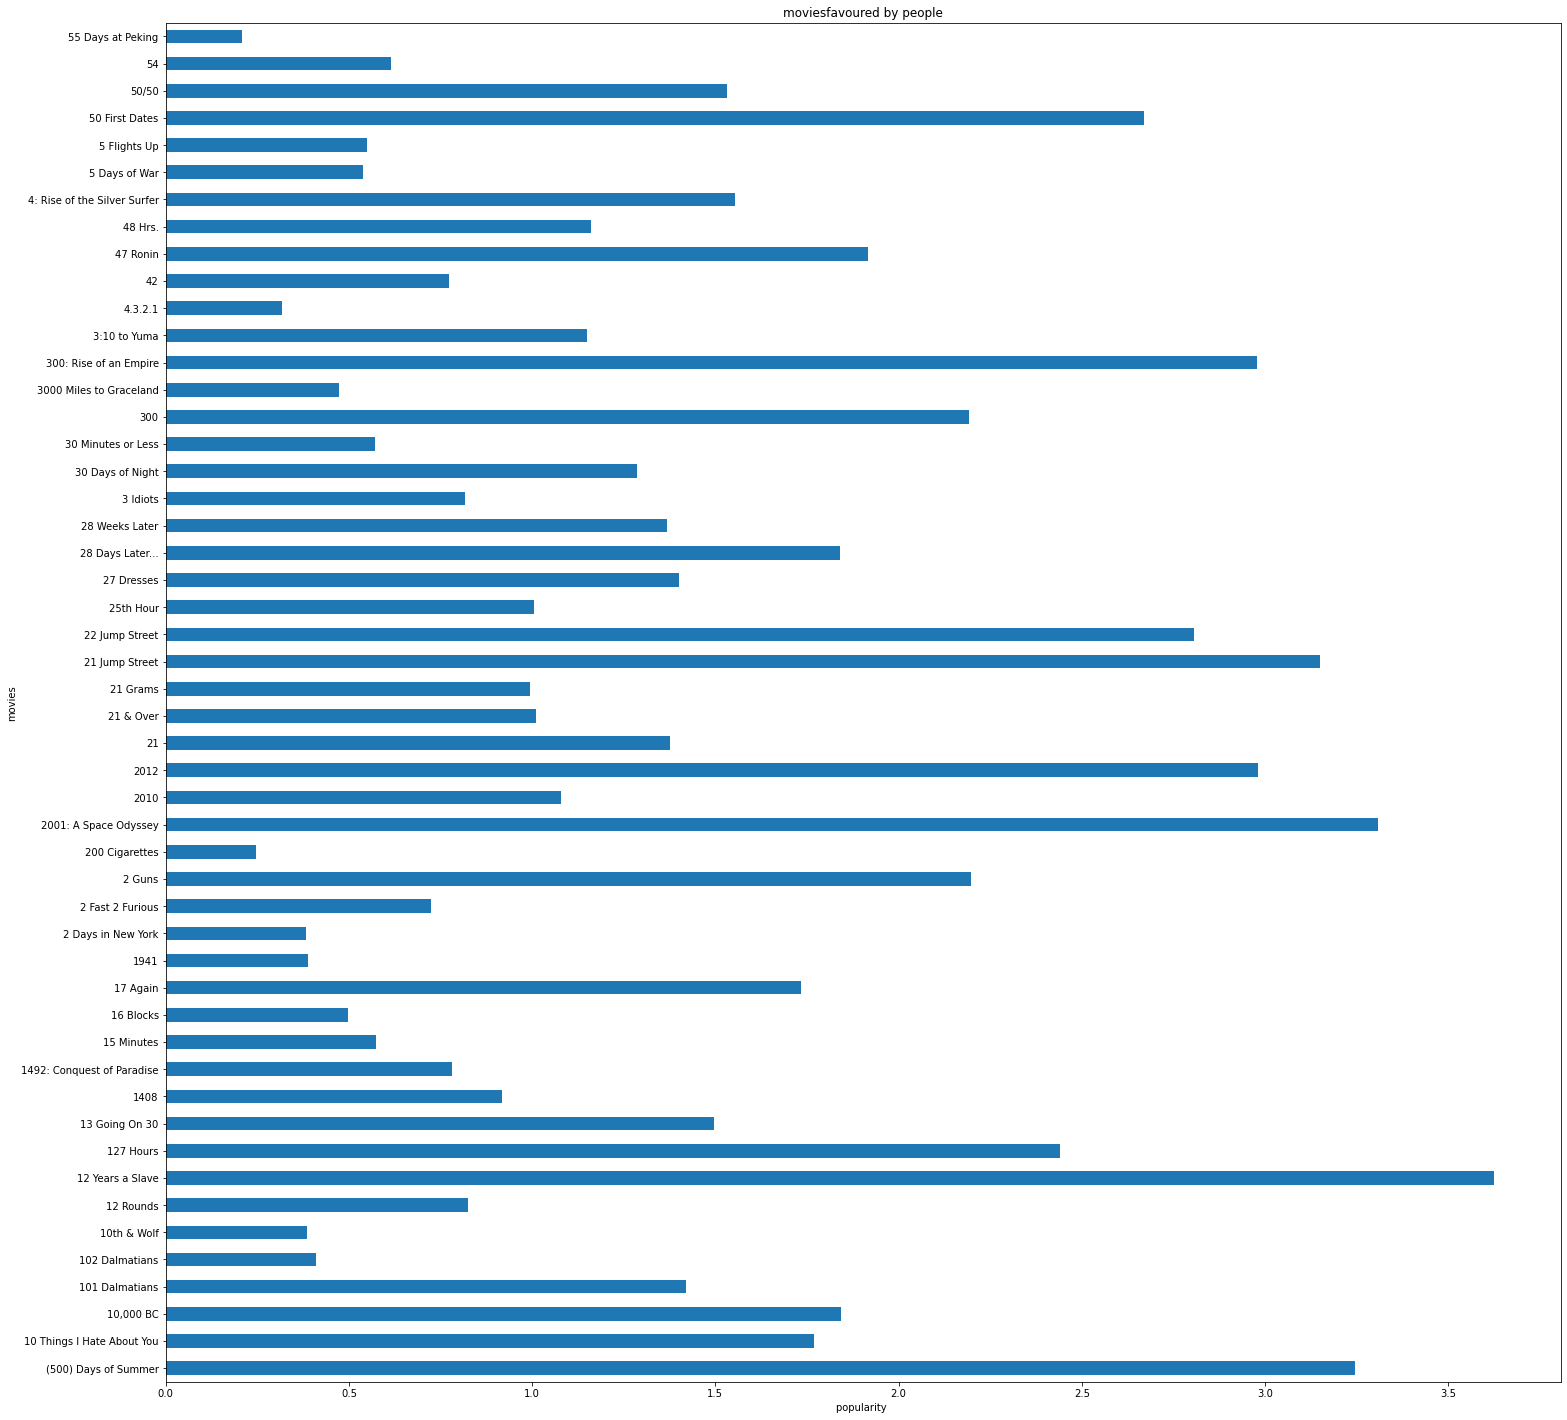

In [213]:
e=df_rz.groupby('original_title')['popularity'].mean()[:50]
e.plot(kind="barh",figsize=(25,25))
plt.title("moviesfavoured by people")
plt.ylabel("movies")
plt.xlabel("popularity ")

From the above plot :
<br>
The most favoured movie by the people is 12 years a slave

<a id='conclusions'></a>
## Conclusions


After investigating The data set we find that :

Steven Spielberg is the director with most movies that made high profit.
<br>
Renny Harlin is the director with most movies that were big losses.
<br>
The most frequent genre in high profit movies is action while the most fequent genre in losses is drama.
<br>
The majority of high profit movies are action, comedy, drama or adventure.
<br>
The average runtime of a high profit movie is 116 minutes.
<br>
The most favoured movie by the people is 12 years a slave.
<br>
Here we see that the top four production companies of the high profit movies are : Twentieth century fox film corporation , universal pictures , paramount pictures , walt disney pictures.
<br>
The average budget for movies with high profit movies is 7.827280e+07
<br>
from the graph plot of (2015) and (2014) are the years with the most popular movies .
<br>
Here are the years of the biggest losses and largest profits which are 2009,2014 respectivly.
<br>
As budget increases, the popularity seems to show an increasing trend.
<br>
We can say that investment seems to affect returns positively for a movie (posstive correlation).



Limitations
The dataset has missing values for the revenue ,budget and profit.
<br>
The charachteristics of the movie can not guarantee the success or the faliure of it.
<br>
I dropped some rows maybe it will have an affect on insights 
<br>
The drama  genre is very frequent so they appear in the most popular, least popular and different profit categories of the movies.